# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Bike Demand Project</b></p>


<div class="alert alert-block alert-success ">

## <span style=" color:red">Determines 
    
Features
    
- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog
    




<div class="alert alert-warning alert-info">
<span style=" color:red">1. Import Libraries
</span>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

<div class="alert alert-warning alert-info">
<span style=" color:red">2. Read Dataset
</span>

In [7]:
bike_df = pd.read_csv('store_sharing.csv')
bike_df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [8]:
bike_df.shape

(17414, 10)

In [9]:
bike_df.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [10]:
bike_df.columns = ['timestamp', 'count', 't1', 't2', 'humidity', 'windspeed', 'weathercode', 'holiday', 'weekend', 'season']

In [11]:
bike_df.head()

,timestamp,count,t1,t2,humidity,windspeed,weathercode,holiday,weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [12]:
bike_df.sample(10)

,timestamp,count,t1,t2,humidity,windspeed,weathercode,holiday,weekend,season
15318,2016-10-08 14:00:00,2172,15.5,15.5,72.5,16.0,7.0,0.0,1.0,2.0
3889,2015-06-15 12:00:00,1406,17.5,17.5,45.5,19.0,2.0,0.0,0.0,1.0
6001,2015-09-11 16:00:00,2347,20.0,20.0,53.0,21.0,1.0,0.0,0.0,2.0
7464,2015-11-12 08:00:00,4579,12.5,12.5,91.0,7.5,2.0,0.0,0.0,2.0
4740,2015-07-21 03:00:00,58,16.0,16.0,77.0,18.5,1.0,0.0,0.0,1.0
15066,2016-09-28 02:00:00,73,15.5,15.5,88.0,20.5,2.0,0.0,0.0,2.0
13019,2016-07-02 23:00:00,894,15.0,15.0,70.0,20.0,1.0,0.0,1.0,1.0
6043,2015-09-13 18:00:00,1887,15.0,15.0,65.5,15.0,2.0,0.0,1.0,2.0
258,2015-01-14 19:00:00,1254,9.0,5.5,71.0,27.0,3.0,0.0,0.0,3.0
123,2015-01-09 04:00:00,47,11.0,11.0,85.0,33.0,3.0,0.0,0.0,3.0


In [13]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    17414 non-null  object 
 1   count        17414 non-null  int64  
 2   t1           17414 non-null  float64
 3   t2           17414 non-null  float64
 4   humidity     17414 non-null  float64
 5   windspeed    17414 non-null  float64
 6   weathercode  17414 non-null  float64
 7   holiday      17414 non-null  float64
 8   weekend      17414 non-null  float64
 9   season       17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


<div class="alert alert-warning alert-info">
<span style=" color:red">3. Check missing values and if there are any dublicate rows or not.
</span>

In [15]:
bike_df.isnull().sum()[bike_df.isnull().sum() > 0]

Series([], dtype: int64)

<div class="alert alert-warning alert-info">
<span style=" color:red">4. Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)
</span>


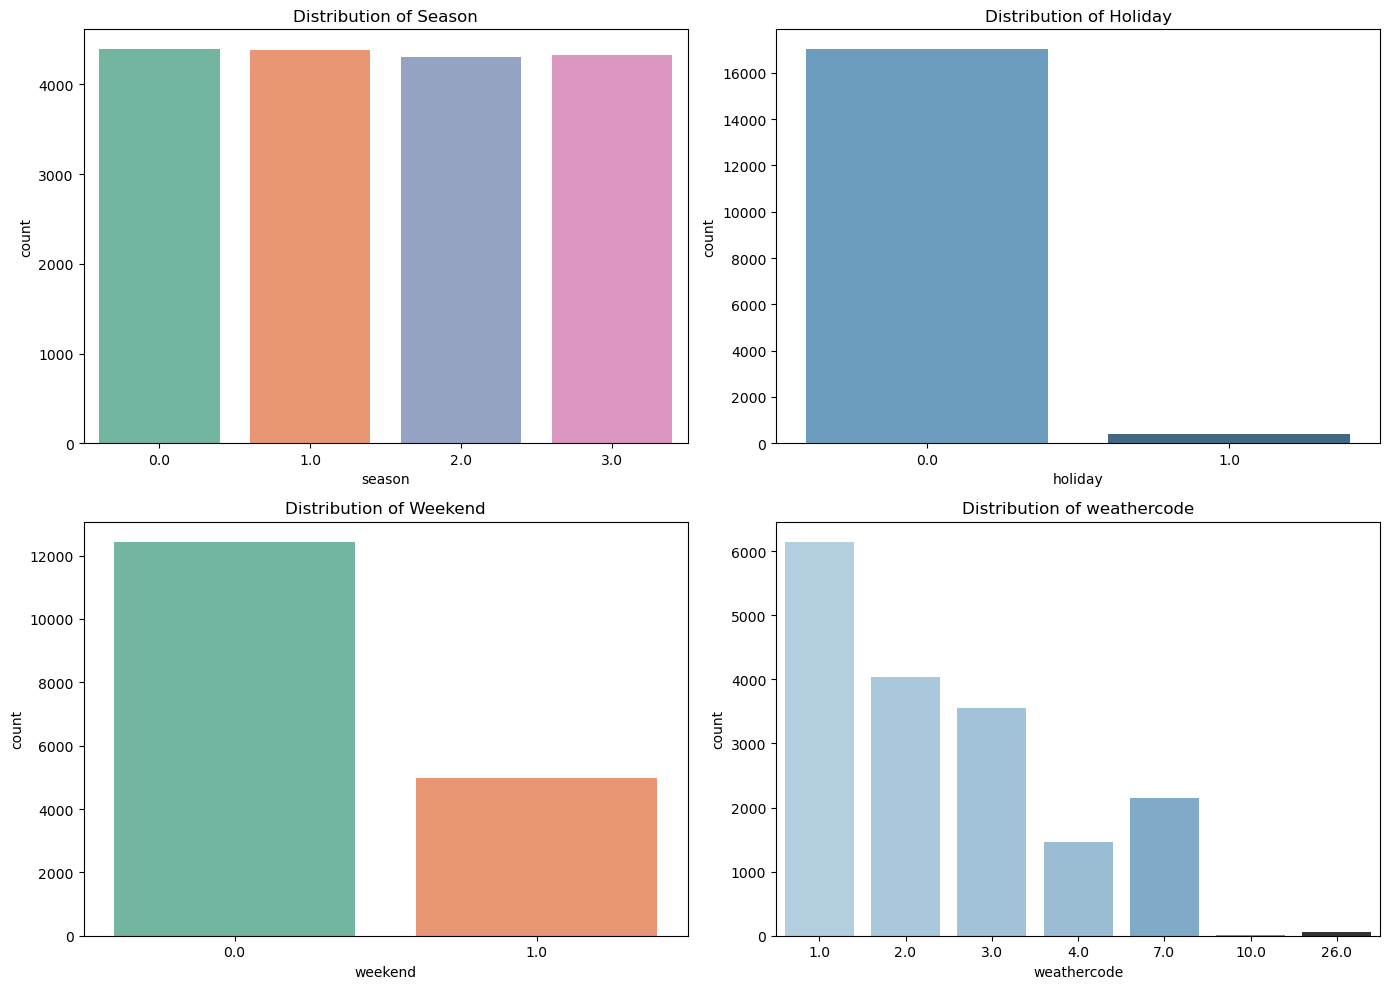

In [17]:
fig, ax = plt.subplots(2, 2, figsize = (14, 10))
sns.countplot(data = bike_df, x = 'season', ax = ax[0, 0], hue = 'season', palette = 'Set2', legend = False)
ax[0, 0].set_title('Distribution of Season')

sns.countplot(data = bike_df, x = 'holiday', ax = ax[0, 1], hue = 'holiday', palette = 'Blues_d', legend = False)
ax[0, 1].set_title('Distribution of Holiday')

sns.countplot(data = bike_df, x = 'weekend', ax = ax[1, 0], hue = 'weekend', palette = 'Set2', legend = False )
ax[1, 0].set_title('Distribution of Weekend')

sns.countplot(data = bike_df, x = 'weathercode', ax = ax[1, 1], hue = 'weathercode', palette = 'Blues_d', legend = False)
ax[1, 1].set_title('Distribution of weathercode')

plt.tight_layout()
plt.show()

# weather_code
sns.countplot(x='weather_code',data=df)

1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
2 = scattered clouds / few clouds
3 = Broken clouds
4 = Cloudy
7 = Rain/ light Rain shower/ Light rain
10 = rain with thunderstorm
26 = snowfall
94 = Freezing Fog

<div class="alert alert-warning alert-info">
<span style=" color:red">5. Look at the data type of each variable, transform timestamp in type, and set it as index.
</span>

In [20]:
bike_df.sample(5)

,timestamp,count,t1,t2,humidity,windspeed,weathercode,holiday,weekend,season
15662,2016-10-22 22:00:00,589,10.0,10.0,82.0,6.0,1.0,0.0,1.0,2.0
13961,2016-08-11 09:00:00,2210,17.0,17.0,70.5,20.5,7.0,0.0,0.0,1.0
14830,2016-09-18 06:00:00,123,15.0,15.0,94.0,8.0,3.0,0.0,1.0,2.0
12234,2016-05-30 15:00:00,2224,16.0,16.0,68.0,22.0,3.0,1.0,0.0,0.0
6573,2015-10-05 21:00:00,319,16.0,16.0,94.0,10.0,7.0,0.0,0.0,2.0


In [21]:
bike_df['timestamp'] = pd.to_datetime(bike_df['timestamp'])


In [22]:
bike_df.set_index('timestamp', inplace=True)

In [23]:
weathercode_mapping = {
    1: 'Clear / Mostly clear with haze/fog',
    2: 'Scattered clouds / Few clouds',
    3: 'Broken clouds',
    4: 'Cloudy',
    7: 'Rain / Light rain shower',
    10: 'Rain with thunderstorm',
    26: 'Snowfall',
    94: 'Freezing fog'
}
bike_df['weathercode_description'] = bike_df['weathercode'].map(weathercode_mapping)

In [24]:
bike_df.head()

,count,t1,t2,humidity,windspeed,weathercode,holiday,weekend,season,weathercode_description
timestamp,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,Broken clouds
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,Clear / Mostly clear with haze/fog
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,Clear / Mostly clear with haze/fog
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,Clear / Mostly clear with haze/fog
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,Clear / Mostly clear with haze/fog


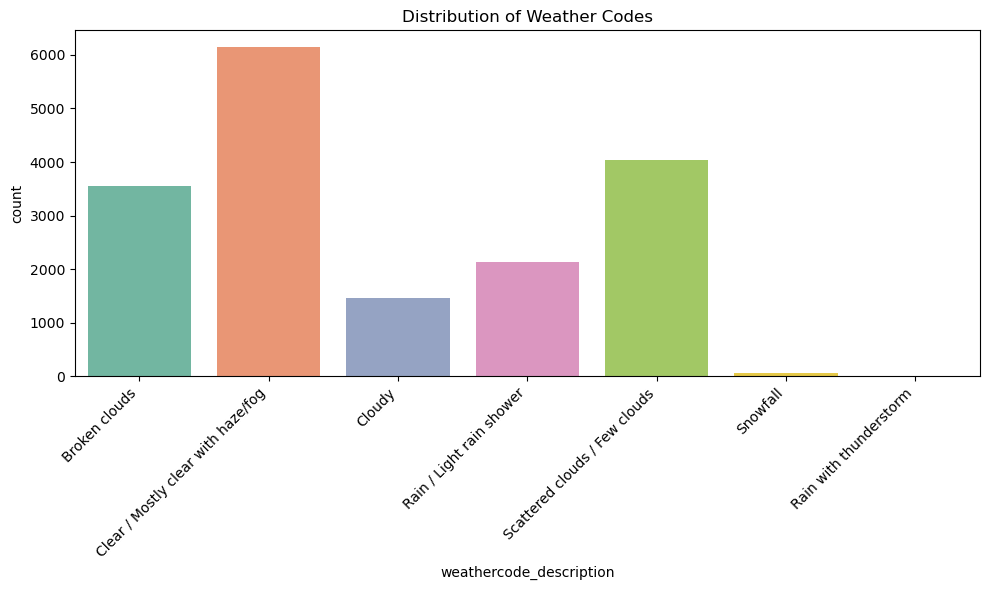

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x= 'weathercode_description', hue = 'weathercode_description', data = bike_df, palette = 'Set2', legend = False)
plt.title('Distribution of Weather Codes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">6. Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)
</span>

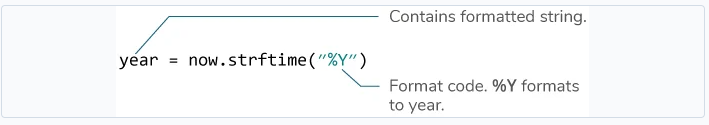

In [28]:
bike_df['day_of_the_week'] = bike_df.index.day_name()
bike_df['day_of_the_month'] = bike_df.index.day
bike_df['hour'] = bike_df.index.hour
bike_df['month'] = bike_df.index.month
bike_df['year'] = bike_df.index.year

In [29]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

bike_df['season'] = bike_df['month'].apply(get_season)

In [30]:
bike_df.head()

,count,t1,t2,humidity,windspeed,weathercode,holiday,weekend,season,weathercode_description,day_of_the_week,day_of_the_month,hour,month,year
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,Winter,Broken clouds,Sunday,4,0,1,2015
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,Winter,Clear / Mostly clear with haze/fog,Sunday,4,1,1,2015
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,Winter,Clear / Mostly clear with haze/fog,Sunday,4,2,1,2015
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,Winter,Clear / Mostly clear with haze/fog,Sunday,4,3,1,2015
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,Winter,Clear / Mostly clear with haze/fog,Sunday,4,4,1,2015


In [31]:
bike_df[['day_of_the_week', 'day_of_the_month', 'hour', 'month', 'season', 'year']].sample(5)

,day_of_the_week,day_of_the_month,hour,month,season,year
timestamp,,,,,,
2015-12-07 02:00:00,Monday,7,2,12,Winter,2015
2015-12-08 02:00:00,Tuesday,8,2,12,Winter,2015
2016-11-19 10:00:00,Saturday,19,10,11,Fall,2016
2015-06-21 23:00:00,Sunday,21,23,6,Summer,2015
2015-05-28 21:00:00,Thursday,28,21,5,Spring,2015


<div class="alert alert-warning alert-info">
<span style=" color:red">7. Visualize the correlation with a heatmap
</span>

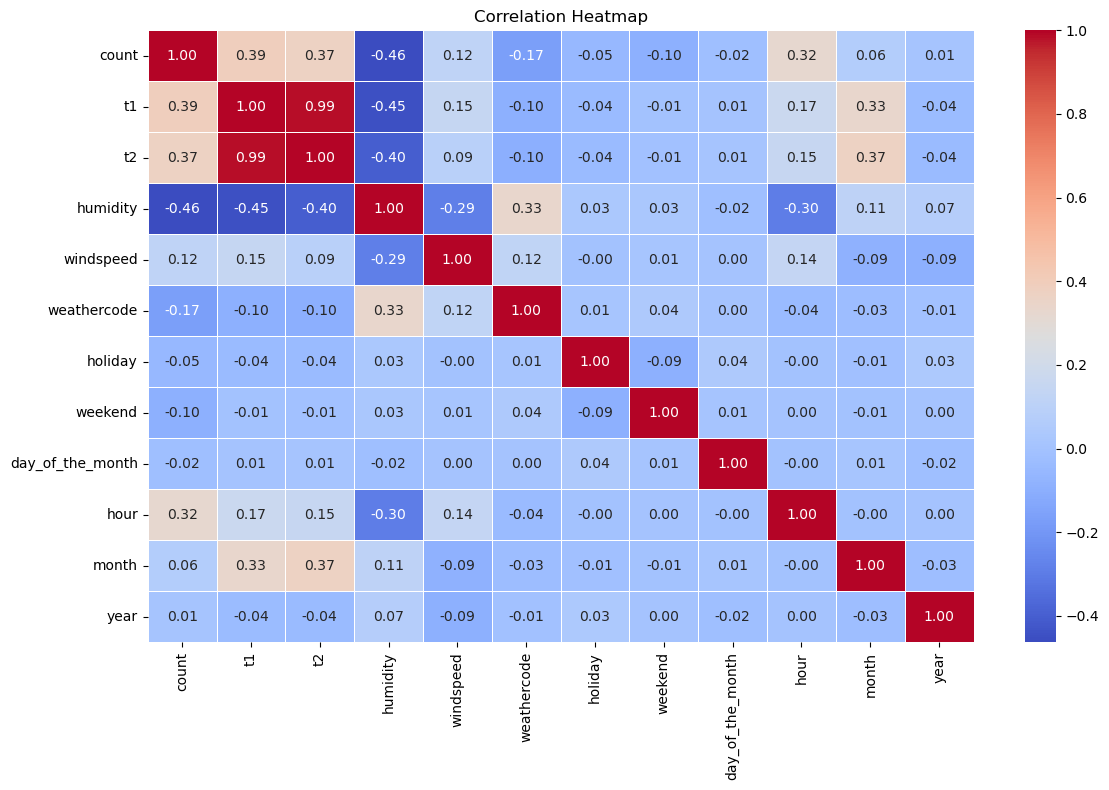

In [33]:
numeric_bike_df = bike_df.select_dtypes(include=['number'])
correlation_matrix = numeric_bike_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">8. Visualize the correlation of the target variable and the other features with barplot
</span>

In [35]:
bike_df.describe().T

,count,mean,std,min,25%,50%,75%,max
count,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
humidity,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
windspeed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
weathercode,17414.0,2.722752,2.341163,1.0,1.0,2.0,3.00,26.0
holiday,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
weekend,17414.0,0.285403,0.451619,0.0,0.0,0.0,1.00,1.0
day_of_the_month,17414.0,15.751981,8.793704,1.0,8.0,16.0,23.00,31.0
hour,17414.0,11.513265,6.915893,0.0,6.0,12.0,18.00,23.0


C:\Users\Hp\AppData\Local\Temp\ipykernel_19440\3843211410.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = target_correlation.index, y = target_correlation.values, palette='viridis')


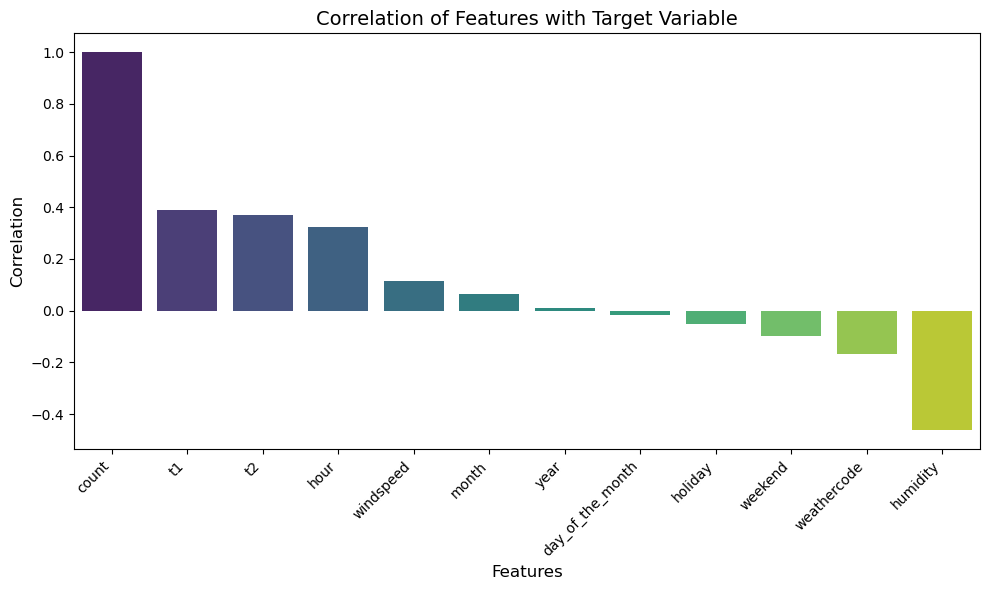

In [36]:
numeric_df = bike_df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
target_correlation = correlation_matrix['count'].sort_values(ascending=False)

# Create a barplot to visualize the correlation
plt.figure(figsize=(10, 6))
sns.barplot(x = target_correlation.index, y = target_correlation.values, palette='viridis')

plt.title('Correlation of Features with Target Variable', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">9. Plot bike shares over time use lineplot.
</span>

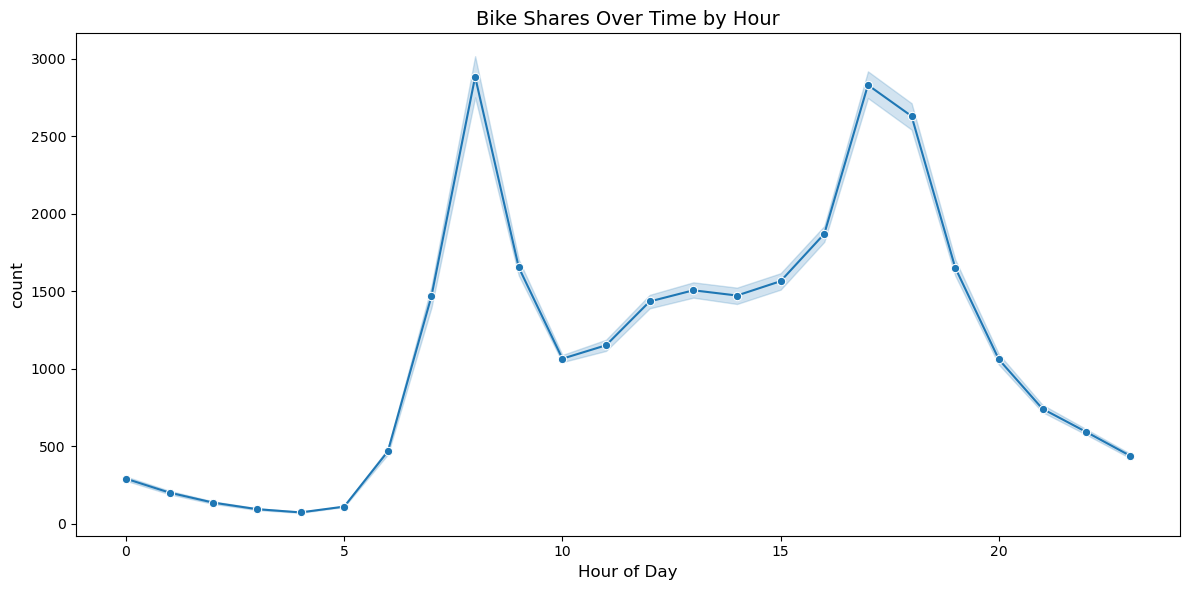

In [38]:
plt.figure(figsize=(12, 6))
sns.lineplot(data = bike_df, x = 'hour', y = 'count', marker = 'o')
plt.title('Bike Shares Over Time by Hour', fontsize = 14)
plt.xlabel('Hour of Day', fontsize = 12)
plt.ylabel('count', fontsize = 12)
plt.tight_layout()
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">10. Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).
</span>

In [40]:
bike_shares_by_months_and_year = bike_df.groupby(['year', 'month'])['count'].sum().reset_index()

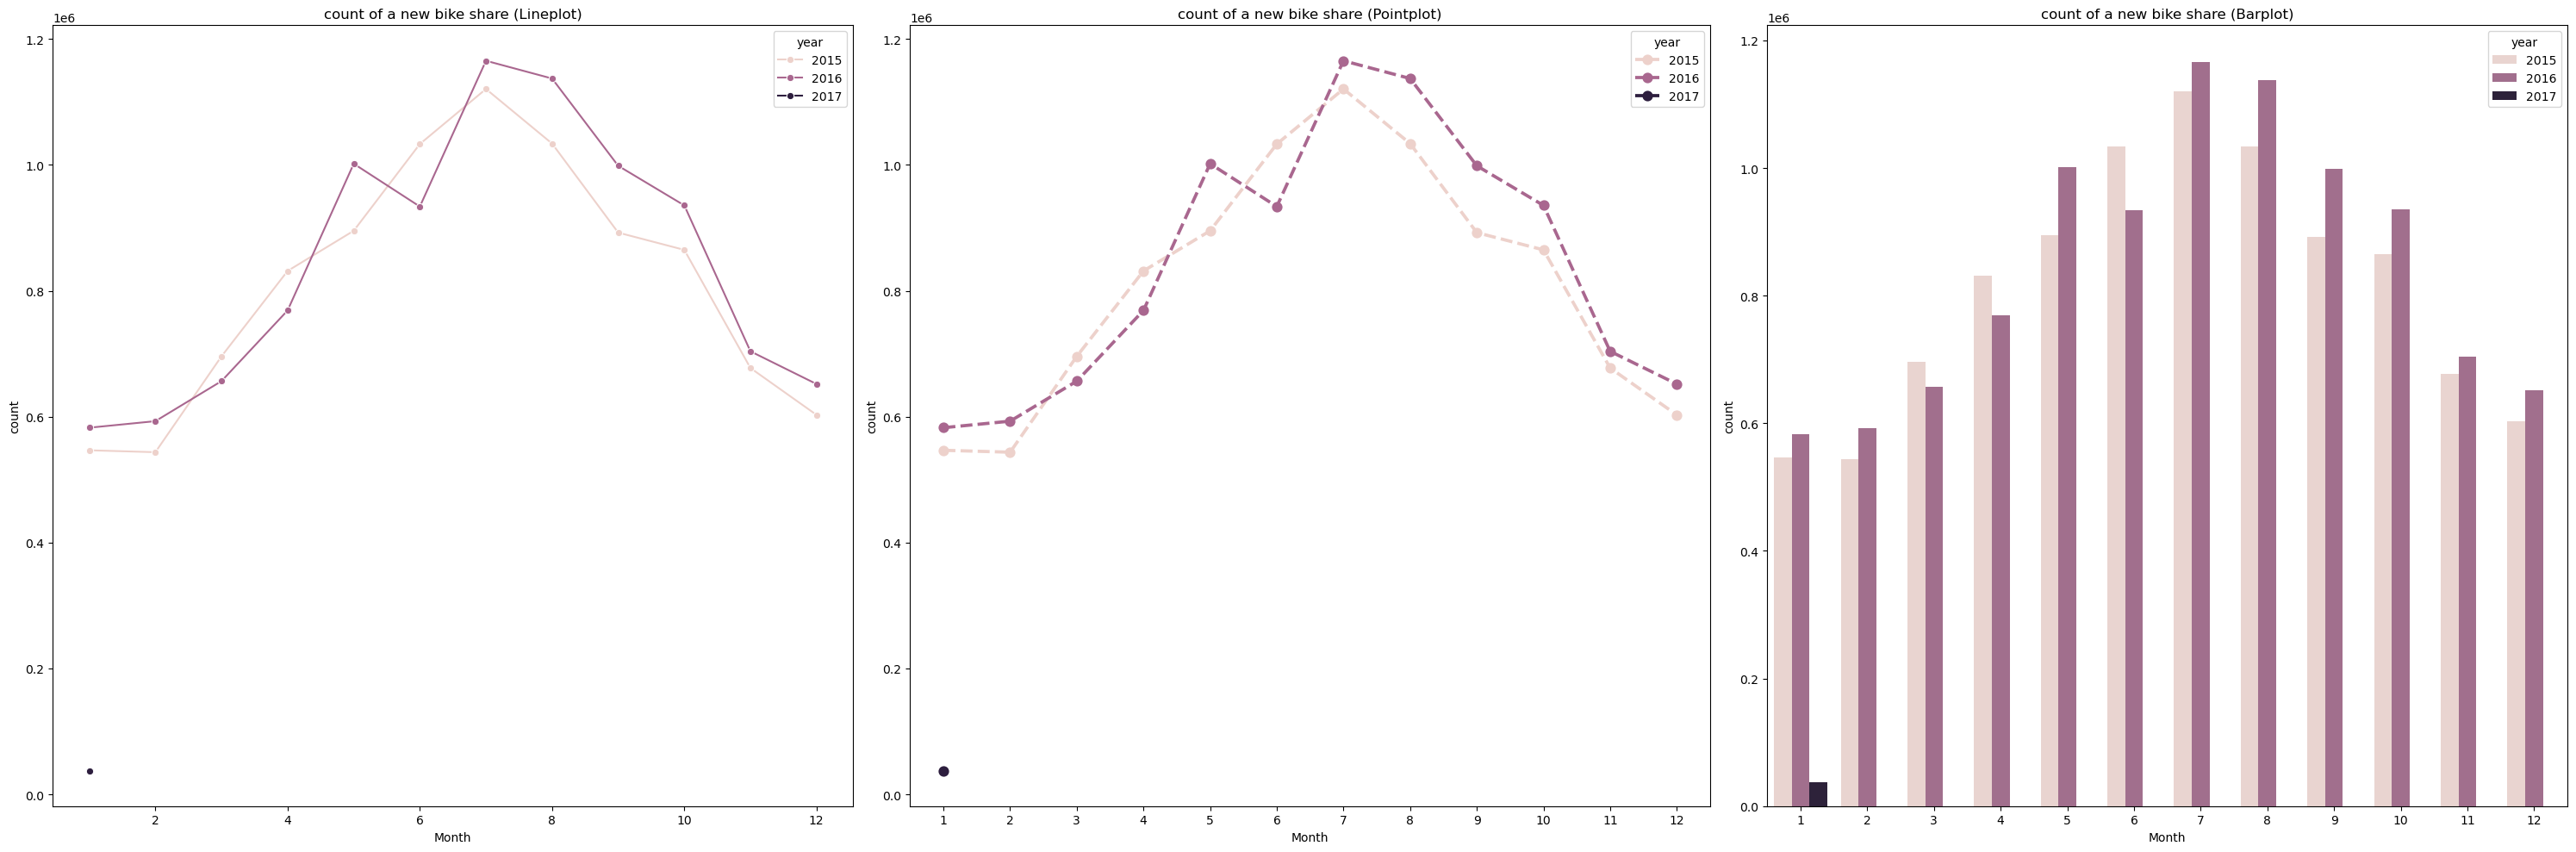

In [41]:
plt.figure(figsize=(30, 10))
plt.subplot(1, 3, 1)
sns.lineplot(data = bike_shares_by_months_and_year, x='month', y='count', hue='year', marker='o')
plt.title('count of a new bike share (Lineplot)')
plt.xlabel('Month')
plt.ylabel('count');

plt.subplot(1, 3, 2)
sns.pointplot(data = bike_shares_by_months_and_year, x = 'month', y='count', hue = 'year', markers = 'o', linestyles = '--')
plt.title('count of a new bike share (Pointplot)')
plt.xlabel('Month')
plt.ylabel('count')

plt.subplot(1, 3, 3)
sns.barplot(data = bike_shares_by_months_and_year, x = 'month', y = 'count', hue = 'year')
plt.title('count of a new bike share (Barplot)')
plt.xlabel('Month')
plt.ylabel('count')

plt.tight_layout()
plt.show();

<div class="alert alert-warning alert-info">
<span style=" color:red">11. Plot bike shares by hours on (holidays, weekend, season).
</span>

In [43]:
bike_shares_by_hour = bike_df.groupby(['hour', 'weekend', 'holiday', 'season'])['count'].sum().reset_index()

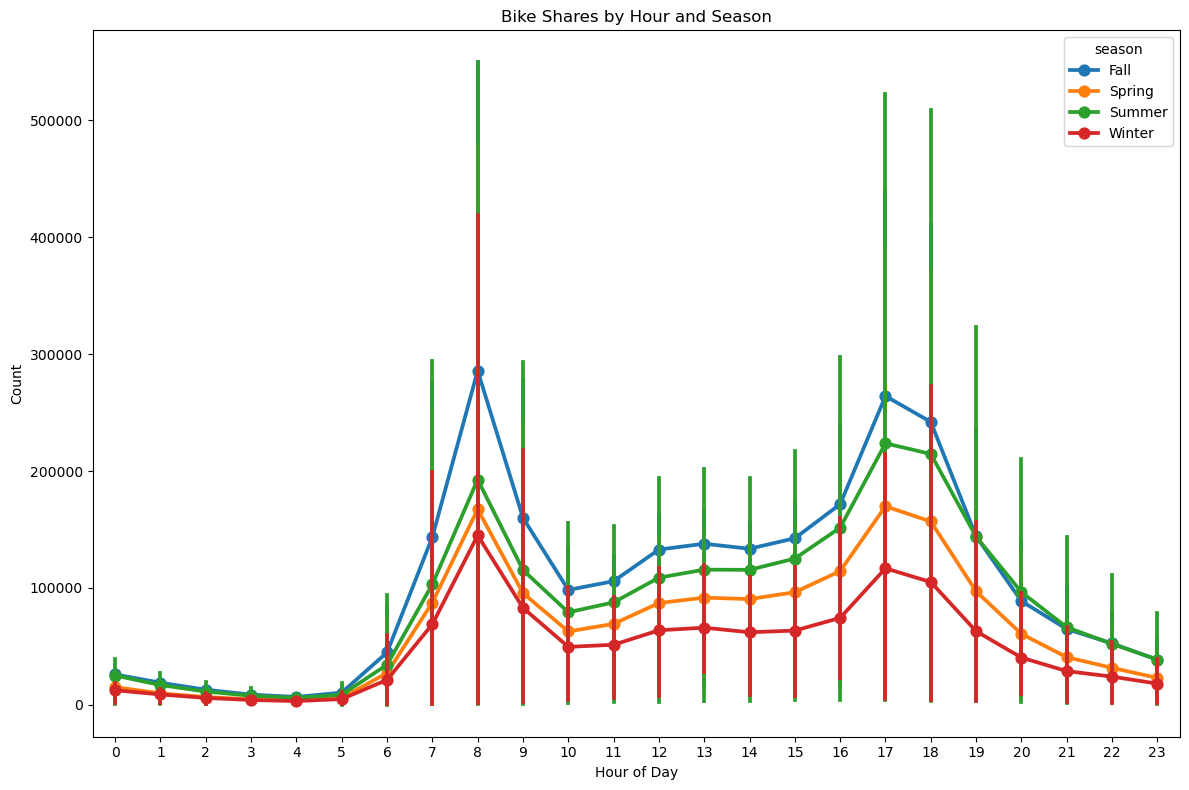

In [44]:
plt.figure(figsize=(12, 8))
sns.pointplot(data = bike_shares_by_hour, x = 'hour', y = 'count', hue = 'season', markers = 'o')
plt.title('Bike Shares by Hour and Season')
plt.xlabel('Hour of Day')
plt.ylabel('Count')

plt.tight_layout()
plt.show();

<div class="alert alert-warning alert-info">
<span style=" color:red"> 12. Plot bike shares by day of week.

- You may want to see whether it is a holiday or not
</span>

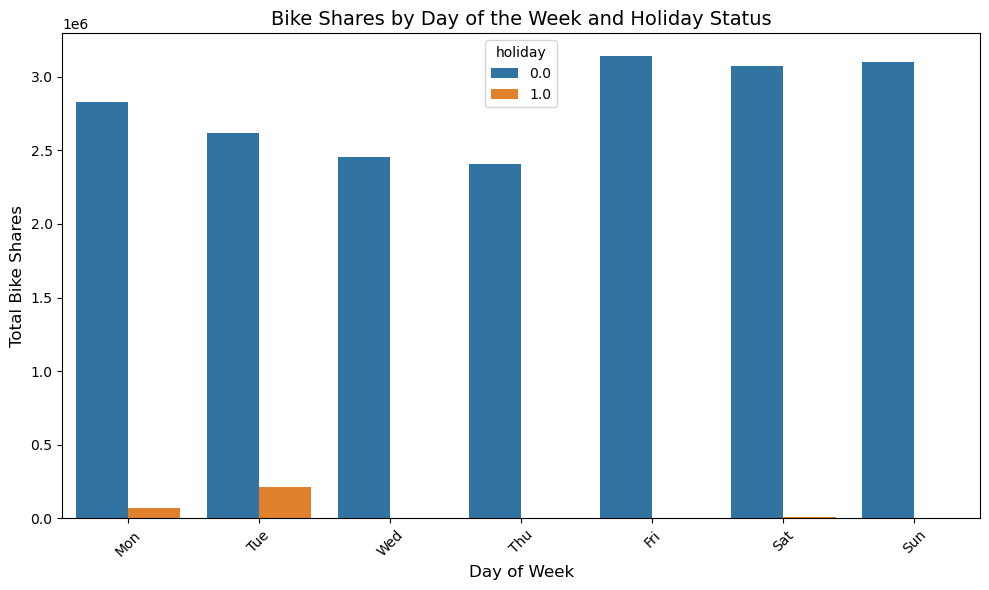

In [46]:
bike_shares_by_day = bike_df.groupby(['day_of_the_week', 'holiday'])['count'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x = 'day_of_the_week', y = 'count', hue = 'holiday', data = bike_shares_by_day)
plt.title('Bike Shares by Day of the Week and Holiday Status', fontsize=14)
plt.xlabel('Day of Week', fontsize = 12)
plt.ylabel('Total Bike Shares', fontsize = 12)
plt.xticks(ticks = range(7), labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)

plt.tight_layout()
plt.show();

<div class="alert alert-warning alert-info">
<span style=" color:red"> 13. Plot bike shares by day of month
</span>

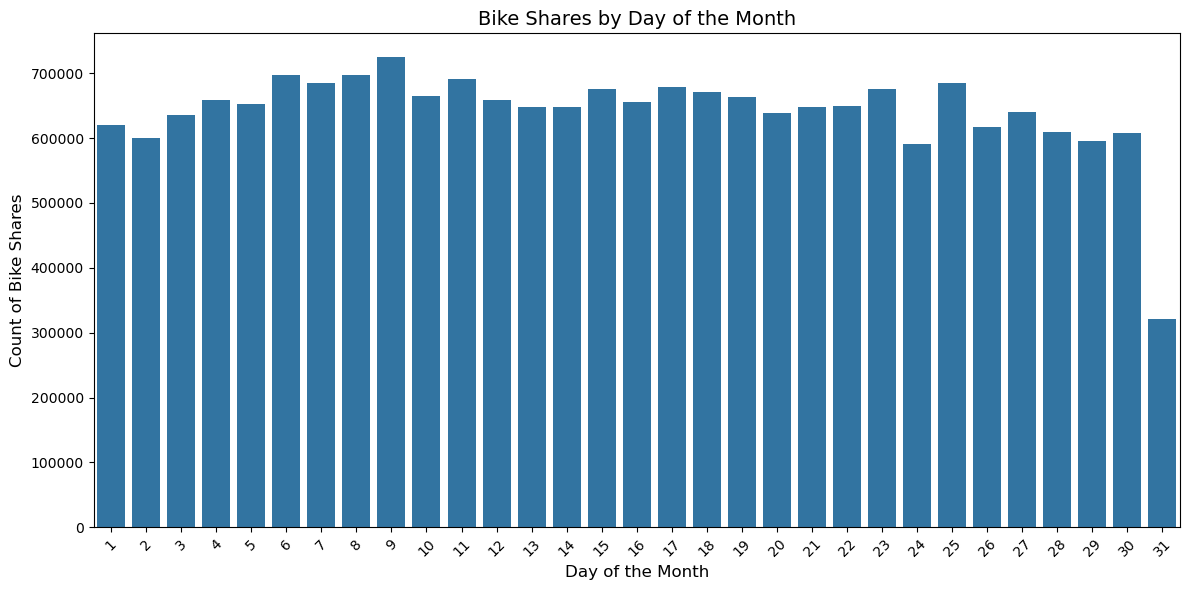

In [48]:
bike_shares_by_day_of_month = bike_df.groupby('day_of_the_month')['count'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data = bike_shares_by_day_of_month, x = 'day_of_the_month', y = 'count')
plt.title('Bike Shares by Day of the Month', fontsize=14)
plt.xlabel('Day of the Month', fontsize=12)
plt.ylabel('Count of Bike Shares', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red"> 14. Plot bike shares by year

- Plot bike shares on holidays by seasons
</span>

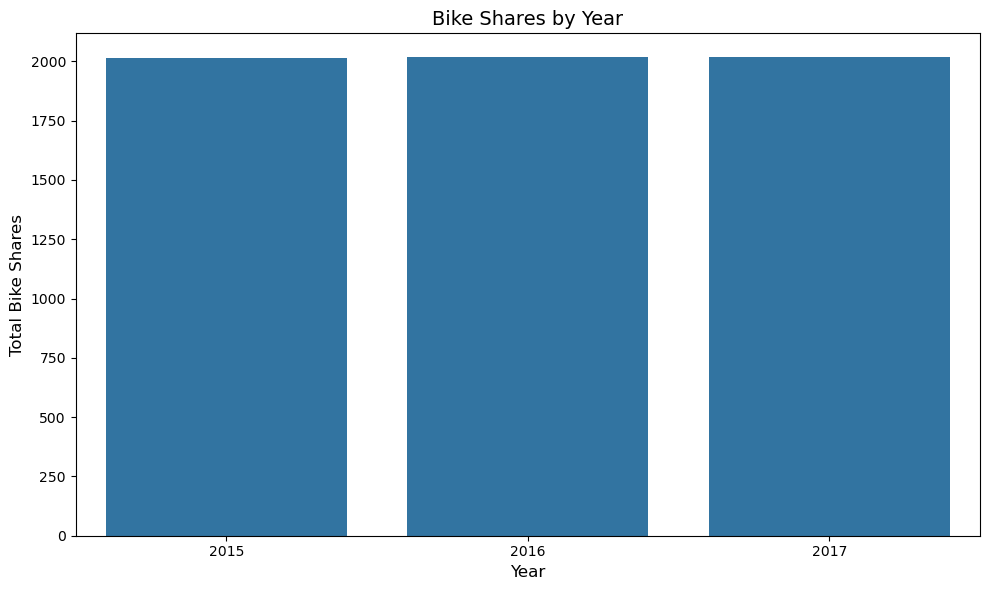

In [50]:
bike_shares_by_year = bike_df.groupby('year')['count'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='year', data=bike_shares_by_year)
plt.title('Bike Shares by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Bike Shares', fontsize=12)
plt.tight_layout()
plt.show()

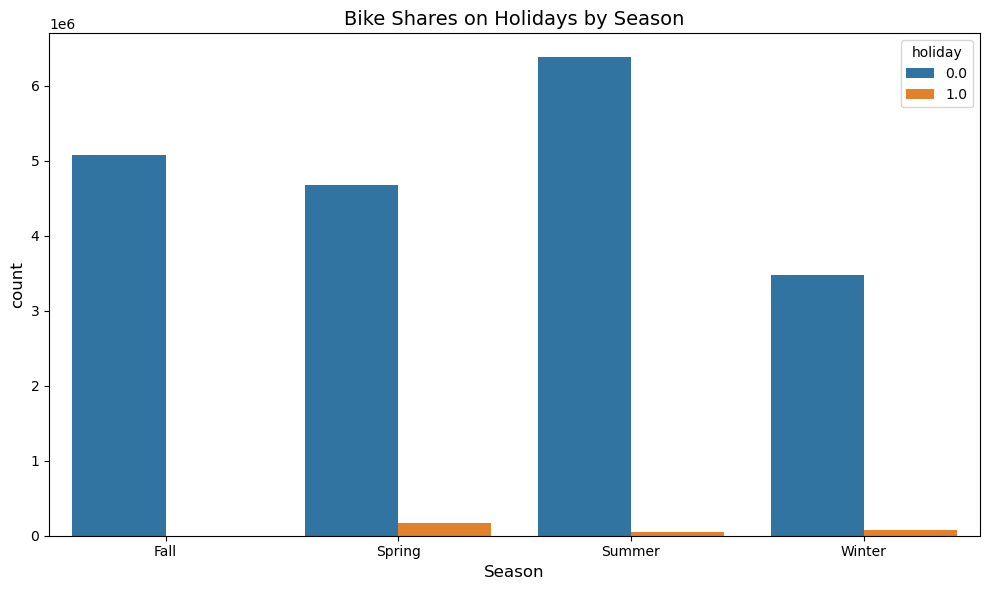

In [51]:
bike_shares_by_season_on_holidays = bike_df.groupby(['holiday', 'season'])['count'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=bike_shares_by_season_on_holidays, x='season', y='count', hue = 'holiday')
plt.title('Bike Shares on Holidays by Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.tight_layout()
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">15. Visualize the distribution of bike shares by weekday/weekend with piechart and barplot
</span>

In [58]:
bike_df_agg = bike_df.groupby('weekend')['count'].sum().reset_index()
bike_df_agg['day_type'] = bike_df_agg['weekend'].map({0: 'Weekday', 1: 'Weekend'})

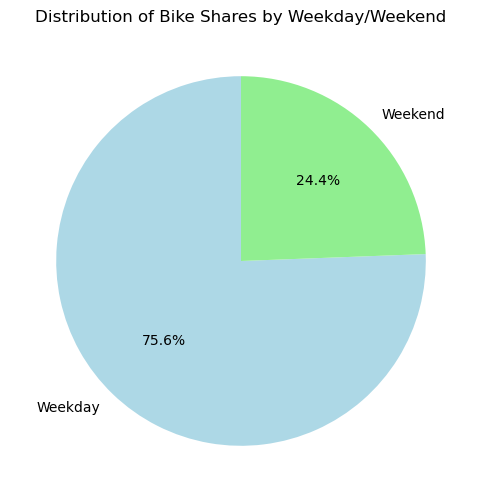

In [62]:
plt.figure(figsize=(6, 6))
plt.pie(bike_df_agg['count'], labels=bike_df_agg['day_type'], autopct='%1.1f%%', colors=['lightblue', 'lightgreen'], startangle=90)
plt.title('Distribution of Bike Shares by Weekday/Weekend')
plt.show()

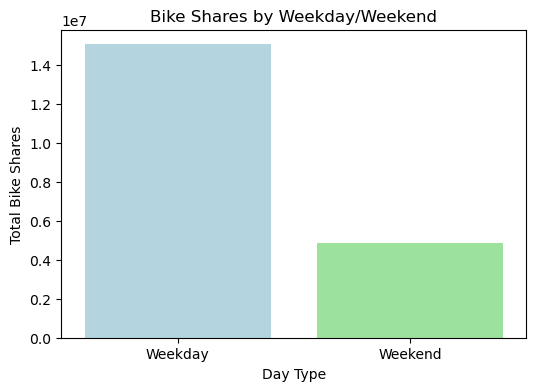

In [68]:
plt.figure(figsize=(6, 4))
sns.barplot(x='day_type', y='count', hue='day_type', data=bike_df_agg, palette=['lightblue', 'lightgreen'], legend=False)
plt.title('Bike Shares by Weekday/Weekend')
plt.xlabel('Day Type')
plt.ylabel('Total Bike Shares')
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">16. Plot the distribution of weather code by seasons
</span>

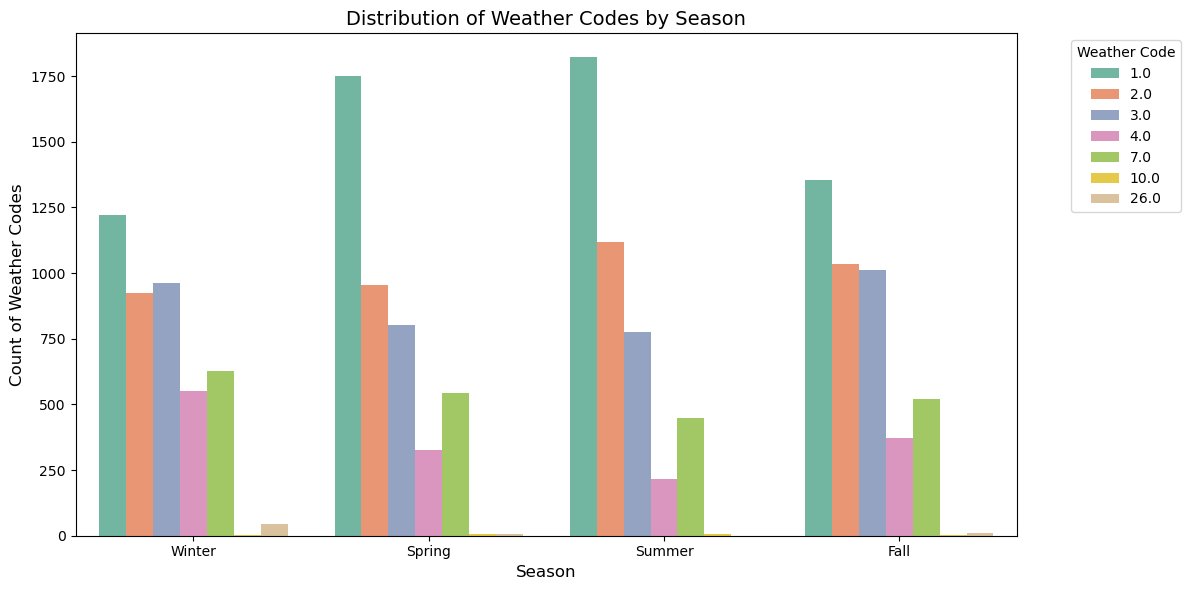

In [70]:
plt.figure(figsize=(12, 6))
sns.countplot(data=bike_df, x='season', hue='weathercode', palette='Set2')

plt.title('Distribution of Weather Codes by Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Count of Weather Codes', fontsize=12)
plt.legend(title='Weather Code', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend outside the plot
plt.tight_layout()
plt.show()

<div class="alert alert-info alert-info ">

# <span style=" color:red">Conclusions
    

    

</span>

In [ ]:
# 1) Weather Impact on Bike Shares:

# Bike shares are highest during clear weather, followed by scattered clouds or few clouds.

# Interestingly, bike shares are relatively higher during rainy conditions compared to overcast (cloudy) conditions.

# There is no bike share activity during freezing fog, indicating extreme weather conditions significantly deter bike usage.

# 2) Hourly Bike Share Trends:

# Bike shares peak at 8:00 AM, likely corresponding to morning commutes.

# Activity begins to rise around 5:00 AM, reaching its highest point at 8:00 AM, after which it gradually declines.

# A secondary peak occurs between 4:00 PM and 5:00 PM, likely due to evening commutes, followed by a steady drop in activity.

# 3) Monthly and Seasonal Trends:

# Bike shares are lowest in January and February, likely due to colder winter weather.

# Activity begins to rise in March, reaching its highest levels in July and August (summer months).

# Bike shares are significantly higher in summer compared to other seasons, with the lowest usage observed in winter.

# 3) Day-of-Week Trends:

# Bike shares remain relatively consistent throughout the week, with no significant fluctuations.

# However, there is a slight variation on the last day of the week (likely Sunday), which may reflect changes in weekend activity patterns.

# Summary:
# Optimal Conditions: Clear weather and summer months (July and August) are the most favorable for bike shares.

# Commute Influence: Morning and evening peaks align with typical commuting hours, indicating that bike shares are heavily influenced by work-related travel.

# Weather Sensitivity: Extreme weather conditions, such as freezing fog, completely deter bike usage, while rainy conditions have a lesser impact compared to overcast skies.

# Seasonal Impact: Bike shares are highly seasonal, with summer being the most active period and winter the least.


# These can help in planning bike share operations, such as increasing bike availability during peak hours and seasons, and reducing services during extreme weather conditions or low-demand periods.



# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Bike Demand Project</b></p>
